# Multi-Armed Bandit

In [1]:
%pip install numpy
%pip install matplotlib
import multi_armed_bandit as mab


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Environment

In [2]:
def playing_with_env():
    num_arms = 5
    bandit = mab.MultiArmedBandits(num_arms)

    print(f"True means of the arms: {bandit.mu}")
    print(f"True standard deviations of the arms: {bandit.sigma}")

    # Pull an arm multiple times
    chosen_arm = 2
    rewards = [bandit.pull_arm(chosen_arm) for _ in range(10)]
    print(f"Rewards from pulling arm {chosen_arm}: {rewards}")

    # Try pulling all arms once
    all_arm_rewards = [bandit.pull_arm(i) for i in range(num_arms)]
    print(f"Rewards from pulling each arm once: {all_arm_rewards}")

    # Reset the bandit (no change in this simple implementation)
    bandit.reset()
    print("Bandit reset.")
    print(f"True means after reset: {bandit.mu}")


playing_with_env()

True means of the arms: [ 0.23691043  1.02042487  1.37351637 -0.21848563  1.53139526]
True standard deviations of the arms: [1. 1. 1. 1. 1.]
Rewards from pulling arm 2: [2.1282926141082448, 2.427142707226017, 1.3667907378547457, 1.4058791890600815, 0.5119803862182674, 2.0953015612154022, 1.5555459046679858, 0.7244857107810428, -2.018788146405845, 1.9929511862592542]
Rewards from pulling each arm once: [-0.1714690201626986, 3.5637381742651284, 0.7758445999444873, -0.4478512526176488, 1.310609257601546]
Bandit reset.
True means after reset: [ 0.23691043  1.02042487  1.37351637 -0.21848563  1.53139526]


## 10-armed Bandits

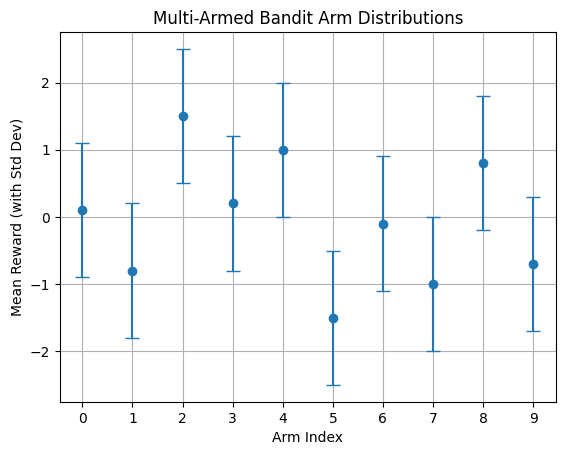

In [3]:
def ten_armed_bandits():
    env = mab.MultiArmedBandits(
        10, mu=[0.1, -0.8, 1.5, 0.2, 1.0, -1.5, -0.1, -1, 0.8, -0.7]
    )
    env.plot_arm_distributions()


ten_armed_bandits()

## 2000 runs, with 1000 Episodes each

In [4]:
def many_runs(params):
    avg_rewards = []
    avg_optimals = []
    labels = []
    for p in params:
        r, o = mab.simulates(**p)
        avg_rewards.append(r)
        avg_optimals.append(o)
        labels.append(f"{p}")
    mab.plot_avg_rewards(avg_rewards, labels)
    mab.plot_avg_optimals(avg_optimals, labels)

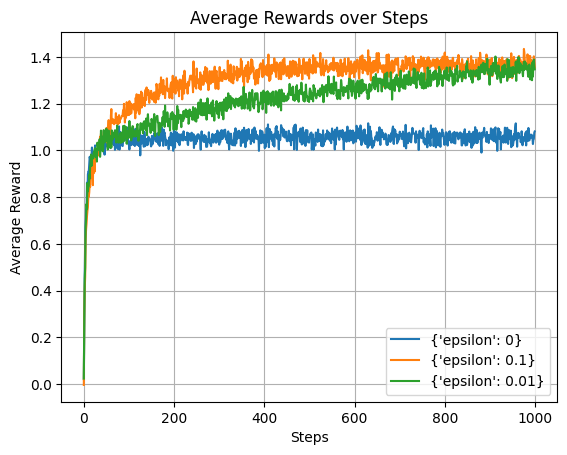

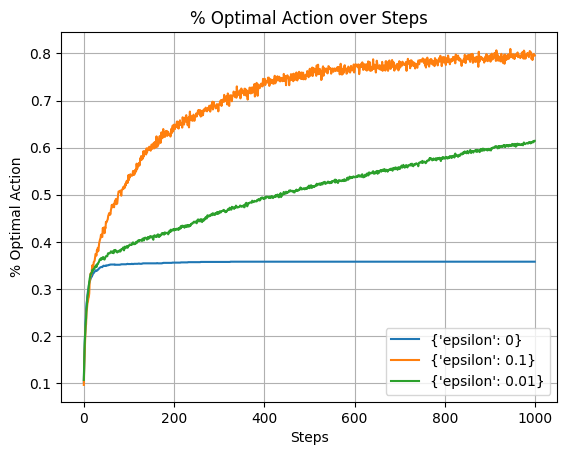

In [5]:
many_runs(
    params=[
        {"epsilon": 0},
        {"epsilon": 0.1},
        {"epsilon": 0.01},
    ]
)

## 2000 runs, with 1000 Episodes each, Optimistic Value = 5

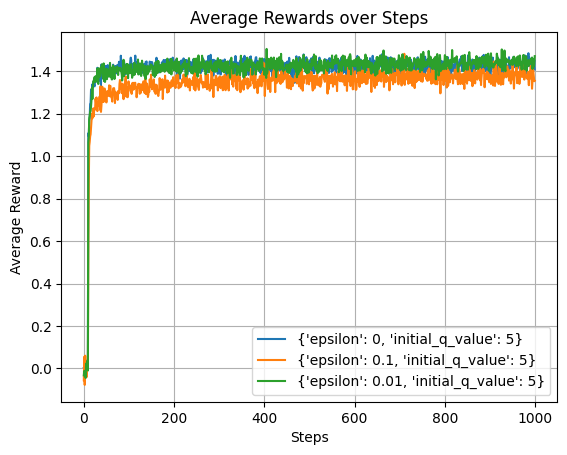

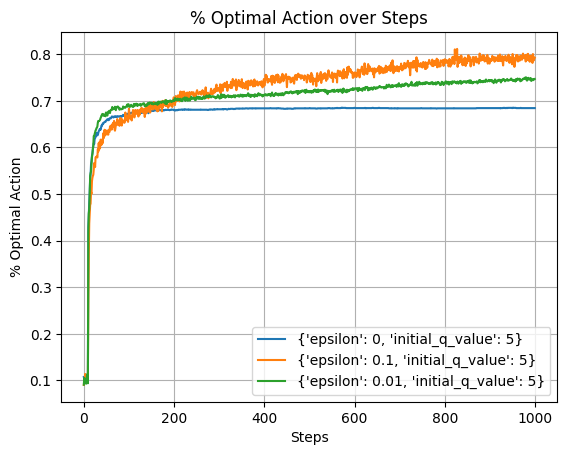

In [6]:
many_runs(
    params=[
        {"epsilon": 0, "initial_q_value": 5},
        {"epsilon": 0.1, "initial_q_value": 5},
        {"epsilon": 0.01, "initial_q_value": 5},
    ]
)

## 2000 runs, with 1000 Episodes each, Optimistic Value = 5, alpha = 0.1

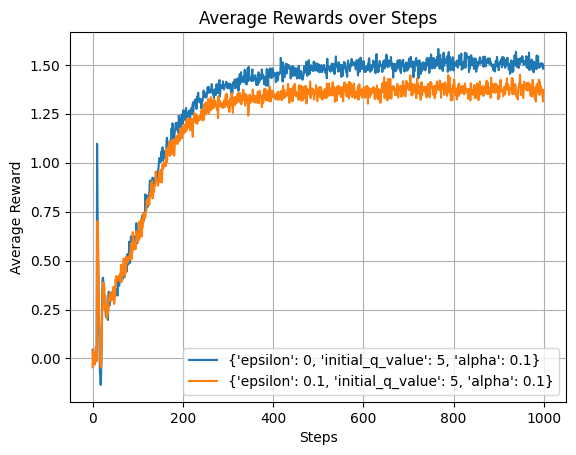

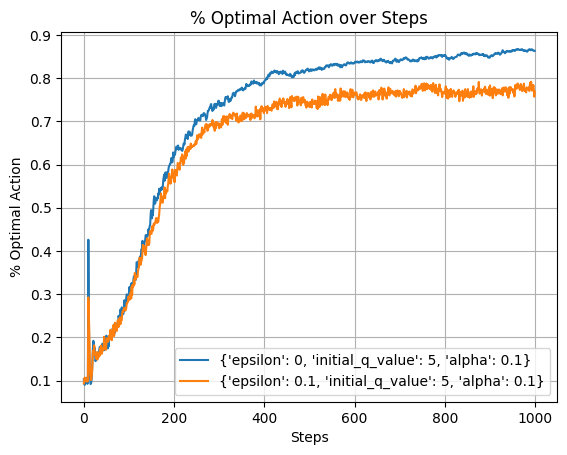

In [7]:
many_runs(
    params=[
        {"epsilon": 0, "initial_q_value": 5, "alpha": 0.1},
        {"epsilon": 0.1, "initial_q_value": 5, "alpha": 0.1},
    ]
)

## Upper-Confidence-Bound Action Selection

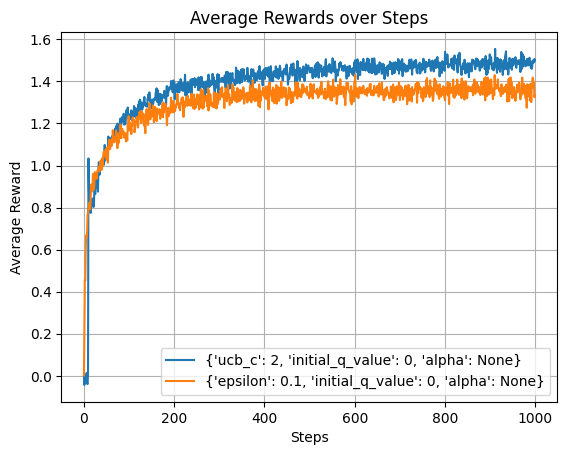

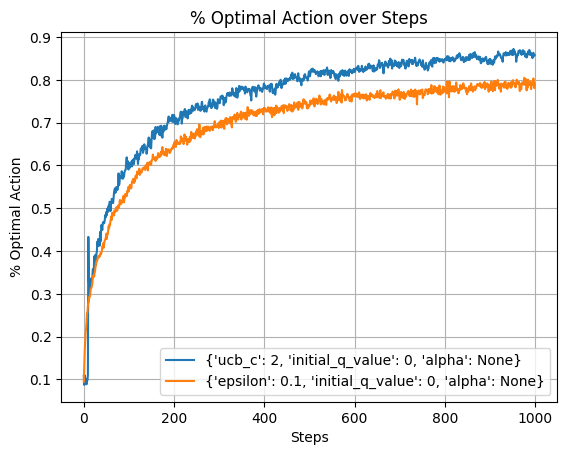

In [7]:
many_runs(
    params=[
        {"ucb_c": 2, "initial_q_value": 0, "alpha": None},
        {"epsilon": 0.1, "initial_q_value": 0, "alpha": None},
    ]
)

## Gradient Bandit

In [2]:
def gradient_badit_many_runs(params):
    avg_rewards = []
    avg_optimals = []
    labels = []
    for p in params:
        r, o = mab.gradient_bandit_simulates(**p)
        avg_rewards.append(r)
        avg_optimals.append(o)
        labels.append(f"{p}")
    mab.plot_avg_rewards(avg_rewards, labels)
    mab.plot_avg_optimals(avg_optimals, labels)

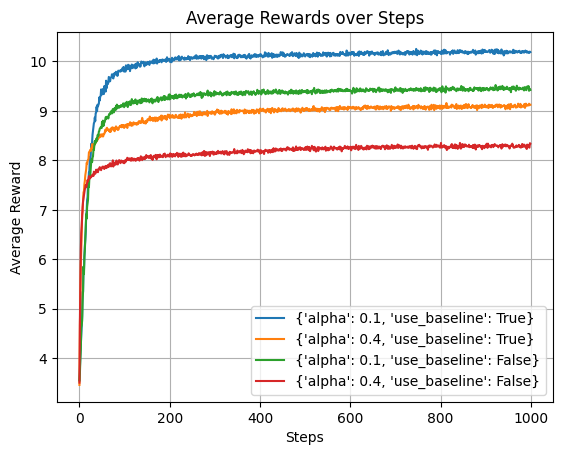

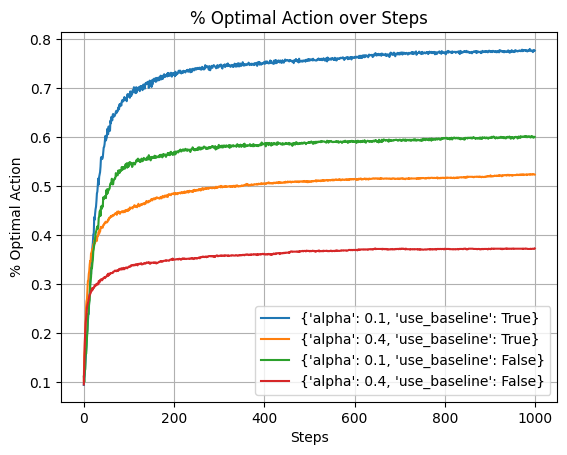

In [3]:
gradient_badit_many_runs(
    params=[
        {"alpha": 0.1, "use_baseline": True},
        {"alpha": 0.4, "use_baseline": True},
        {"alpha": 0.1, "use_baseline": False},
        {"alpha": 0.4, "use_baseline": False},
    ]
)